In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Tuple

In [2]:
# experiment_folder = "/home/kenzo/experiments/alexnet-pretrained-50ep/"
# experiment_folder = "/home/kenzo/experiments/resnet18-pretrained-50ep/"
# experiment_folder = "/home/kenzo/experiments/vggnet11pretrained-50ep/"
# experiment_folder = "/home/kenzo/experiments/vggnet11pretrained-50ep/"
experiment_folder = "/home/kenzo/experiments/alexnet-pretrained-super_aug-200ep/"


# Loss final de cada fold

In [3]:
summarized_fold_info_df = pd.read_csv(experiment_folder + "summarized_fold_info.csv")
summarized_fold_info_df.set_index("fold", inplace=True)


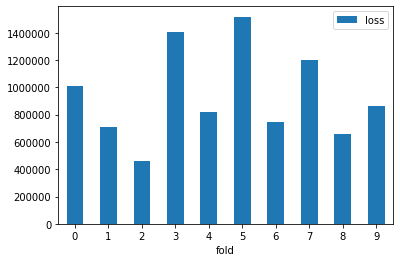

In [4]:
summarized_fold_info_df.plot.bar(rot=0)

# Predições

In [5]:
def scatter_plot_and_save(experiment_name: str,
                          real: Tuple,
                          pred: Tuple) -> None:

    plt.figure()

    # controls default text sizes
    # plt.rc('font', size=16)          

    # hard-coding axis' max values [xmin, xmax, ymin, ymax]
    # plt.axis([0, 15000, 0, 17500])

    plt.xlabel("REAL")
    plt.ylabel("PREDICTION")

    plt.plot(real, pred, 'co')    
    dashes = [5, 5, 5, 5]
    
    plt.plot(real, real, dashes=dashes, color="#cccccc")

In [6]:
import matplotlib.patches as mpatches 
import numpy as np

def calc_intersections(hist1, hist2) -> float:
    s = 0
    for p in zip(hist1, hist2):
        s += min(p)
    
    return s

def plot_and_save_histogram(experiment_name: str,
                            real: Tuple, 
                            pred: Tuple, 
                            bins: int, 
                            weights=None) -> None:
    plt.figure()
   
    weights = np.ones(len(real)) / len(real)

    range_min = min(np.min(real), np.min(pred))
    range_max = max(np.max(real), np.max(pred))

    full_range = (range_min, range_max)

    n1, bins, _ = plt.hist(real, bins=bins,
                                 range=full_range,
                                 weights=weights, 
                                 facecolor="#34a2eb",
                                 edgecolor="#2c5aa3",
                                 alpha=0.9)
    
    n2, bins, _ = plt.hist(pred, bins=bins, 
                                 range=full_range,
                                 weights=weights,
                                 facecolor="#ffbc47",
                              #    edgecolor="#9e742b", 
                                 alpha=0.6)
    
    real_patch = mpatches.Patch(color='#34a2eb', label='y')
    pred_patch = mpatches.Patch(color='#ffbc47', label='ŷ')
    plt.legend(handles=[real_patch, pred_patch])
    
    intersection = calc_intersections(n1, n2)
    print(intersection)

In [7]:
# test = pd.read_csv("/home/biomassa/exp/biomassa-verde-grouped-csvs/grouped-csvs/id-real-pred-numbered-csvs/experiment#9.csv", names=["id", "real_value", "prediction"], index_col=0)

In [8]:
predictions_df = pd.read_csv(experiment_folder + "predictions.csv")
predictions_df.head()

,test_index,prediction,real_value
0,267,6787.214844,5778.0
1,194,5209.454590,4444.0
2,186,5222.111328,5333.0
3,277,13001.158203,14000.0
4,123,6243.781738,6667.0


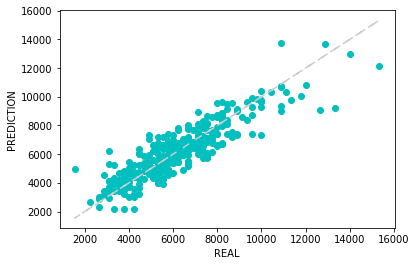

In [9]:
scatter_plot_and_save("Model", predictions_df["real_value"].values, predictions_df["prediction"].values)

0.8424242424242454


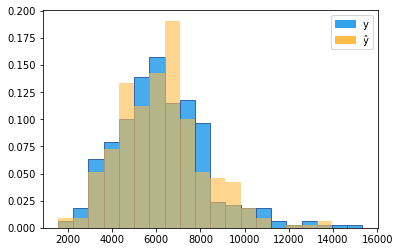

In [10]:
plot_and_save_histogram("Model", predictions_df["real_value"].values, predictions_df["prediction"].values, 20)

In [11]:
from sklearn.metrics import mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
mape = mean_absolute_percentage_error(predictions_df["real_value"].values, predictions_df["prediction"].values)
mae = mean_absolute_error(predictions_df["real_value"].values, predictions_df["prediction"].values)
print(f"MAPE: {mape} // MAE: {mae}")

MAPE: 13.008807279631013 // MAE: 730.6727376302083


# Análise dos folds

In [13]:
raw_fold_info_df = pd.read_csv(experiment_folder + "raw_fold_info.csv")
raw_fold_info_df.head()

,fold,epoch,train_loss,validation_loss
0,0,0,86908854.50,4199766.5
1,0,1,24657813.25,46123396.0
2,0,2,42557947.00,47557820.0
3,0,3,43279540.00,47319352.0
4,0,4,41211923.00,39202056.0


## Loss média de cada época do k-fold

In [14]:
def get_avg_validation_loss(raw_fold_info_df: pd.DataFrame) -> pd.DataFrame:
    
    folds = len(raw_fold_info_df["fold"].unique())

    new_df = raw_fold_info_df[["epoch", "train_loss", "validation_loss"]].groupby("epoch").sum()
    new_df["train_loss"] /= folds
    new_df["validation_loss"] /= folds

    return new_df

In [15]:
teste = get_avg_validation_loss(raw_fold_info_df)

In [16]:
teste.reset_index()

,epoch,train_loss,validation_loss
0,0,6.717802e+07,5.580500e+07
1,1,3.077154e+07,2.853571e+07
2,2,2.824023e+07,2.468210e+07
3,3,2.177799e+07,1.779147e+07
4,4,1.816696e+07,1.619650e+07
...,...,...,...
195,195,1.459127e+04,9.385819e+05
196,196,1.226735e+04,9.528283e+05
197,197,1.357882e+04,9.534356e+05
198,198,2.009151e+04,9.624356e+05


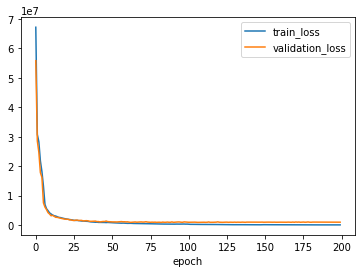

In [17]:
teste.plot()

## Analisando um fold em específico

In [18]:
fold = 1

In [19]:
fold_df = raw_fold_info_df[raw_fold_info_df["fold"] == fold]
fold_df.drop(columns="fold", inplace=True)
fold_df.set_index("epoch", inplace=True)
fold_df.head()

,train_loss,validation_loss
epoch,,
0,3.026964e+07,9041432.0
1,1.379565e+07,3748942.5
2,6.615191e+06,11270627.0
3,6.814452e+06,5732728.5
4,4.813717e+06,6987440.0


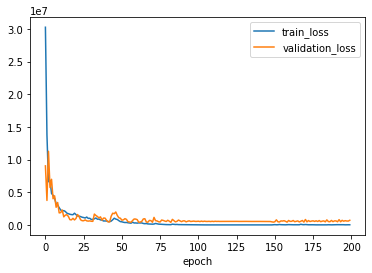

In [20]:
fold_df.plot()

## Métricas de cada fold

In [21]:
from typing import Tuple
from math import sqrt
from scipy.stats import pearsonr

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def get_metrics(real: Tuple, pred: Tuple) -> Tuple:
    unders = []
    overs = []
    for p in zip(pred, real):
        error = p[0] - p[1]
        if error > 0:
            overs.append(error)
        else:
            unders.append(error)
    
    n = len(real)

    # TODO: Usar métricas do sklearn...
    over = np.sum(overs)
    under = np.sum(unders)
    mean_error = (over + under) / n
    mean_abs_error = (over - under) / n
    mse = np.sum([e**2 for e in overs+unders])
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(real, pred)
    correlation = pearsonr(real, pred)[0]

    metrics = {"over": over, "under": under, "mean_error": mean_error,
               "MAE": mean_abs_error, "MSE": mse, "MAPE": mape, "RMSE": rmse, "Pearson Correlation": correlation}
    
    return metrics


In [22]:
330 //10

33

In [23]:
def get_fold_metrics(folds: int, predictions_df: pd.DataFrame) -> pd.DataFrame:

    folds_metrics_df = pd.DataFrame(columns=["fold", "over", "under", "mean_error", "MAE", "MSE", "MAPE", "RMSE", "Pearson Correlation"])

    test_examples = len(predictions_df) // folds
    for i in range(folds):
        current_fold_predictions = predictions_df.iloc[i * test_examples: (i + 1) * test_examples]
        real, pred = current_fold_predictions["real_value"], current_fold_predictions["prediction"]
        metrics = get_metrics(real, pred)
        metrics["fold"] = i + 1

        folds_metrics_df = folds_metrics_df.append(metrics, ignore_index=True)

    return folds_metrics_df

In [29]:
fold_metrics_df = get_fold_metrics(10, predictions_df)

In [30]:
fold_metrics_df = fold_metrics_df.drop(columns=["over", "under"])
fold_metrics_df.set_index("fold", inplace=True)
fold_metrics_df

,mean_error,MAE,MSE,MAPE,RMSE,Pearson Correlation
fold,,,,,,
1.0,-32.565178,811.045765,3.333378e+07,13.862842,5773.541507,0.892694
2.0,-466.000525,686.151271,2.337756e+07,10.790718,4835.034894,0.952589
3.0,-54.882065,501.585102,1.518669e+07,8.559051,3897.010459,0.932971
4.0,-70.685369,818.175012,4.646146e+07,17.705812,6816.264034,0.851589
5.0,124.980876,669.757583,2.696218e+07,11.511056,5192.512140,0.933088
6.0,-30.921431,866.187145,5.007277e+07,15.711840,7076.211253,0.818150
7.0,-40.581528,685.461589,2.471791e+07,12.013413,4971.710682,0.897115
8.0,388.526744,864.758915,3.949938e+07,15.663556,6284.852827,0.879763
9.0,89.337010,682.711951,2.181052e+07,12.002429,4670.173517,0.885434


In [31]:
for metric in fold_metrics_df.columns:
    print(f"{metric}: {fold_metrics_df[metric].mean()} +/- {fold_metrics_df[metric].std()}")

mean_error: -16.456960227272724 +/- 212.3483970112615
MAE: 730.6727376302084 +/- 112.0880698226052
MSE: 30990204.47023214 +/- 11231111.742219483
MAPE: 13.008807279631014 +/- 2.721563538704494
RMSE: 5485.395857371792 +/- 1000.3536919846208
Pearson Correlation: 0.8933191909056177 +/- 0.039904990507861504


# Comparando todos os experimentos

In [48]:
experiment_folder = "/home/kenzo/experiments/"

In [49]:
def get_all_experiments_avg_validation_loss(experiment_folder: str, show_model_names: bool = True):

    experiments_df = pd.DataFrame(columns=["epoch", "train_loss", "validation_loss", "model"])

    for experiment in os.listdir(experiment_folder):
        for root, dirs, files in os.walk(experiment_folder+experiment):
            for file_name in files:

                if "raw_fold_info.csv" in file_name:

                    raw_info_df = pd.read_csv(os.path.join(experiment_folder, experiment, file_name))
                    experiment_avg_loss = get_avg_validation_loss(raw_info_df).reset_index()
                    experiment_avg_loss["model"] = experiment

                    experiments_df = experiments_df.append(experiment_avg_loss, ignore_index=True)

    models = experiments_df["model"].unique()
    models.sort()
    aliases = {name: f"#{i}" for i, name in enumerate(models, start=1)}

    if not show_model_names:
        experiments_df.replace(aliases, inplace=True)
    
    return experiments_df, aliases

In [50]:
df, aliases = get_all_experiments_avg_validation_loss(experiment_folder, show_model_names=False)

In [51]:
aliases

{'alexnet-pretrained-50ep': '#1',
 'alexnet-pretrained-super_aug-200ep': '#2',
 'alexnet-pretrained-super_aug-50ep': '#3',
 'resnet18-pretrained-50ep': '#4',
 'resnet18-pretrained-super_aug-50ep': '#5',
 'vggnet11pretrained-50ep': '#6'}

In [52]:
df = df[["epoch", "validation_loss", "model"]]
# df = df[df["epoch"] < 10] # filtrando epocas
df.set_index("epoch", inplace=True)
df = df.pivot(columns="model")

Text(0.5, 0, 'Epochs')

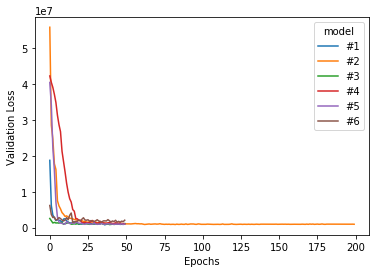

In [53]:
df["validation_loss"].plot()
plt.ylabel("Validation Loss")
plt.xlabel("Epochs")